In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [81]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/a223/Nov-08-2024-00-46-25_0.5985021829704559_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 25])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [82]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,A223_clean.txt,22743.35,22742.0,22744.7,-2.5310,0.0,-0.0712,7.0,0.0,0.0,11.951265,130.9097,0,0
1,A223_clean.txt,22799.60,22798.0,22801.2,-1.3247,0.0,0.0815,7.0,0.0,0.0,11.387113,169.7797,0,0
2,A223_clean.txt,22804.50,22802.0,22807.0,-1.7041,0.0,0.0933,7.0,0.0,0.0,4.850096,330.8306,0,0
3,A223_clean.txt,22868.25,22867.0,22869.5,3.0000,0.0,0.1799,7.0,0.0,0.0,2.062550,129.1946,0,10000000
4,A223_clean.txt,22879.25,22877.0,22881.5,-3.0000,0.0,-0.0060,7.0,0.0,0.0,4.955484,244.7681,0,10000000
5,A223_clean.txt,23067.25,23065.0,23069.5,-2.2191,0.0,0.1172,7.0,0.0,0.0,11.831220,282.4968,0,0
6,A223_clean.txt,23336.60,23333.5,23339.7,-3.0000,0.0,-0.0063,7.0,0.0,0.0,18.219773,296.5276,0,10000000


In [83]:
remove = [23336.60	,22743.35,22799.60	]
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(remove)]
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
2,A223_clean.txt,22804.50,22802.0,22807.0,-1.7041,0.0,0.0933,7.0,0.0,0.0,4.850096,330.8306,0,0
3,A223_clean.txt,22868.25,22867.0,22869.5,3.0000,0.0,0.1799,7.0,0.0,0.0,2.062550,129.1946,0,10000000
4,A223_clean.txt,22879.25,22877.0,22881.5,-3.0000,0.0,-0.0060,7.0,0.0,0.0,4.955484,244.7681,0,10000000
5,A223_clean.txt,23067.25,23065.0,23069.5,-2.2191,0.0,0.1172,7.0,0.0,0.0,11.831220,282.4968,0,0


In [84]:
(solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])).round(3)

np.float64(8.656)

In [73]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.0623996143818213)

In [22]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

np.float64(7.834225)

In [77]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/a223/Nov-08-2024-00-41-42_0.10338844142295434_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[np.logical_and(output_results_pd_df["chi_squared"] < 30, output_results_pd_df["N_Fe"] > 7.5-7.98)])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [78]:
np.mean(output_trimmed["chi_squared"])

np.float64(8.481080558504054)

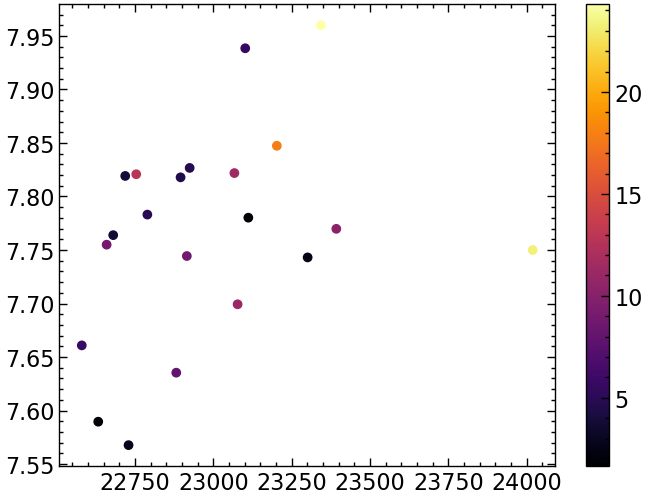

In [79]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [80]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(7.766), np.float64(0.096))

In [85]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/a223/vmac', sep='  ')
fitlist

/tmp/ipykernel_802008/796760162.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/a223/vmac', sep='  ')


,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),...,A(N),A(Mg),A(Na),A(S),A(Si),A(Ca),A(Ni),A(Ti),A(Co),oisorat
0,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.54


In [86]:
rats = np.arange(0.3, 0.9,0.02)
rats = np.repeat(rats, 3)
rats

array([0.3 , 0.3 , 0.3 , 0.32, 0.32, 0.32, 0.34, 0.34, 0.34, 0.36, 0.36,
       0.36, 0.38, 0.38, 0.38, 0.4 , 0.4 , 0.4 , 0.42, 0.42, 0.42, 0.44,
       0.44, 0.44, 0.46, 0.46, 0.46, 0.48, 0.48, 0.48, 0.5 , 0.5 , 0.5 ,
       0.52, 0.52, 0.52, 0.54, 0.54, 0.54, 0.56, 0.56, 0.56, 0.58, 0.58,
       0.58, 0.6 , 0.6 , 0.6 , 0.62, 0.62, 0.62, 0.64, 0.64, 0.64, 0.66,
       0.66, 0.66, 0.68, 0.68, 0.68, 0.7 , 0.7 , 0.7 , 0.72, 0.72, 0.72,
       0.74, 0.74, 0.74, 0.76, 0.76, 0.76, 0.78, 0.78, 0.78, 0.8 , 0.8 ,
       0.8 , 0.82, 0.82, 0.82, 0.84, 0.84, 0.84, 0.86, 0.86, 0.86, 0.88,
       0.88, 0.88, 0.9 , 0.9 , 0.9 ])

In [87]:
len(rats)

93

In [88]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = np.round(rats,3)
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),...,A(N),A(Mg),A(Na),A(S),A(Si),A(Ca),A(Ni),A(Ti),A(Co),oisorat
0,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.30
1,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.30
2,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.30
3,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.32
4,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.88
89,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.88
90,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.90
91,A223_clean.txt,0.0,5000.0,1.0,0.0,7.0,7.5,11.5,8.654,7.0,...,7.766,7.35,5.99,7.66,6.59,5.67,5.24,3.94,3.95,0.90


In [89]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/a223/fitlist_comb', sep=' ', index=False)

In [2]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-07-25-46_0.7358498135708336_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [3]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [4]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-2.071238383983584)

In [5]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    # sort by chi squared and take the first 2
    subdf.sort_values(by='red_chi_squared', inplace=True)
    # subdf = subdf.iloc[:2]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

/tmp/ipykernel_626072/245589135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


In [6]:
subdf

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
30,HD182040_clean.txt,-0.783,-2.126002,1.785475,0.0,5.217628,0.9


0.58 -0.24 0.35


Text(0.5, 0, '16O/18O ratio')

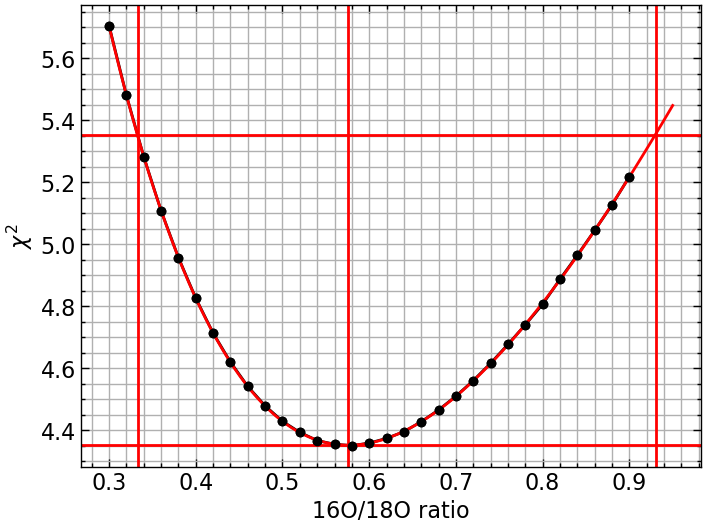

In [7]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 5)
x = np.linspace(0.3,0.95,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.634 -0.116 0.116


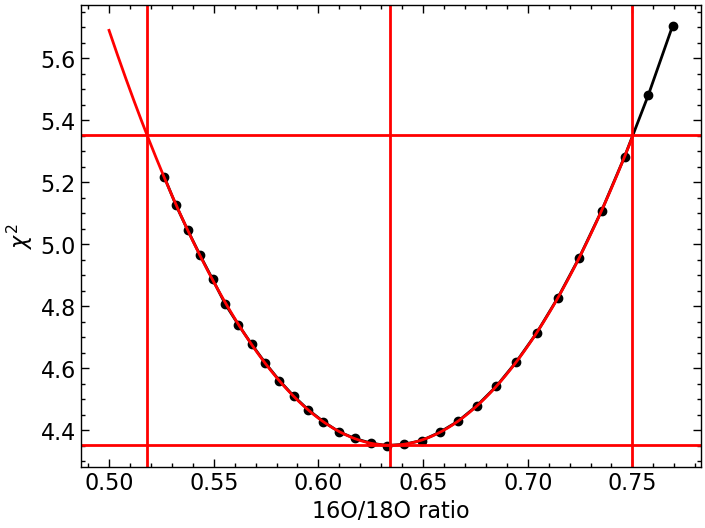

In [9]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.5, 0.75, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

In [124]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-20-38-32_0.25630684911208235_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


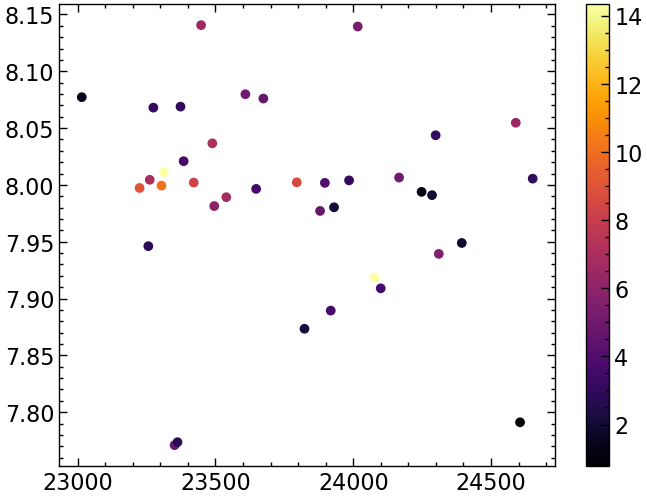

In [125]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [134]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(7.987), np.float64(0.084))

In [135]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.7828921052631578)